<a href="https://colab.research.google.com/github/amutebe/alexmutebe.github.io/blob/main/MACHINE%20LEARNING/UNIT%206/K_Means_Clustering_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import missingno as msno
from sklearn.preprocessing import StandardScaler as scaler


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# chnage directory
%cd /content/drive/MyDrive/ESSEX/ML/UNIT 6/

/content/drive/MyDrive/ESSEX/ML/UNIT 6


Importing wine data in CSV


In [4]:
df = pd.read_csv("Unit06 wine.csv")

Exploratory Analysis

In [ ]:
df.head()

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [21]:
# tabulation for species

Wine = df['Wine'].value_counts()
print(Wine)




Wine
2    71
1    59
3    48
Name: count, dtype: int64


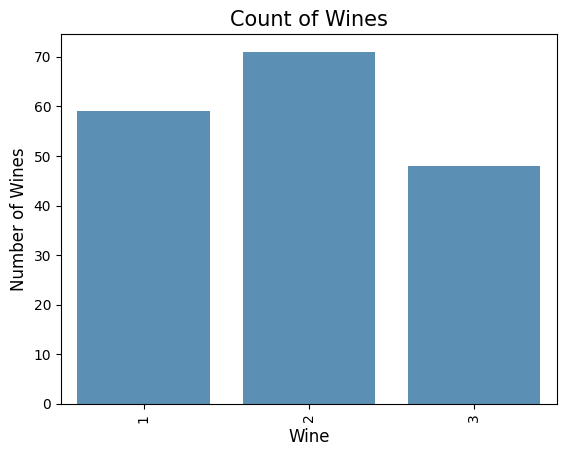

In [20]:
# Visualise Wine in bar plot with seaborn library

import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x = Wine.index, y = Wine.values, alpha=0.8)
plt.ylabel('Number of Wines', fontsize=12)
plt.xlabel('Wine', fontsize=12)
plt.title('Count of Wines', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()


In [ ]:
# Visualising Wine variable


df['Wine'].plot()
plt.show()


In [ ]:
# Check the percentages of missing value

df.isnull().sum() / df.shape[0] * 100

Wine                    0.0
Alcohol                 0.0
Malic.acid              0.0
Ash                     0.0
Acl                     0.0
Mg                      0.0
Phenols                 0.0
Flavanoids              0.0
Nonflavanoid.phenols    0.0
Proanth                 0.0
Color.int               0.0
Hue                     0.0
OD                      0.0
Proline                 0.0
dtype: float64

Distribution graphs

In [31]:
df.head(5)

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
#Descriptives for df

df.describe()


,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [62]:
wcss_values = []
for k in range(1, 5):
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(df.drop('Wine', axis=1))
    #kmeans.fit(df.drop('species', axis=1))
    wcss_values.append(kmeans_model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Elbow curve

In [18]:
print(wcss_values)

[17592404.119463533, 4543807.2526693335, 2370689.686782969, 1333185.6910154882]


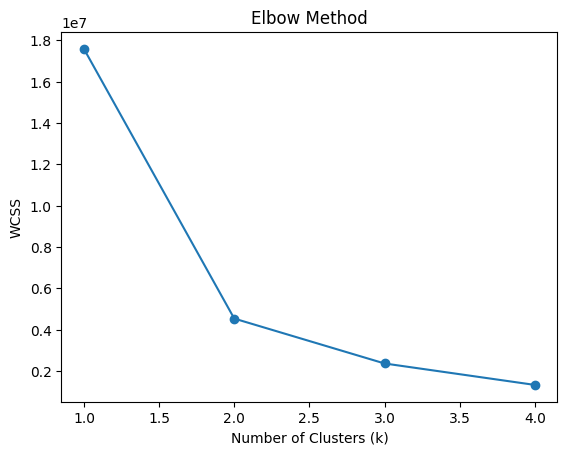

In [63]:
plt.plot(range(1, 5), wcss_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

# observation the elbow method graph

The elbow is at k=3. This means that the data can be best clustered into 3 groups.

From the visualization, we can see that the optimal number of clusters should be around 3. This is where the graph starts to resemble an “elbow.”

In [64]:
#  perform  k means clustering

kmeans_model = KMeans(n_clusters=3, random_state=1)
kmeans_model.fit(df.drop('Wine', axis=1))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=1)

In [65]:
# Upon clustering at K = 3, checking how much similar the three clusters are as compared to the labels of species – setosa, versicolour, and verginica.

import pandas as pd
# Creating a new column with cluster labels
df['cluster'] = kmeans_model.labels_

# Creating a crosstab to check the distribution of species in each cluster
pd.crosstab(df['cluster'], df['Wine'])


Wine,1,2,3
cluster,,,
0,46,1,0
1,0,50,19
2,13,20,29


Observations:
With K=3
Setosa classification is at 100% accurate rate
Versicolor only 2 were misclassified 96% accuracy rate
Virginica has highest misclassification at 72% accuracy rate

This means that the clustering is very accurate for setosa and versicolor, but less accurate for virginica.

To quantify this, we can calculate the accuracy for each species:

- Setosa: 100% (50/50)
- Versicolor: 96% (48/50)
- Virginica: 72% (36/50)

Overall, the clustering is quite good, with an average accuracy of 89%.

Visualization of Wine Clusters using PCA and Scatter Plot

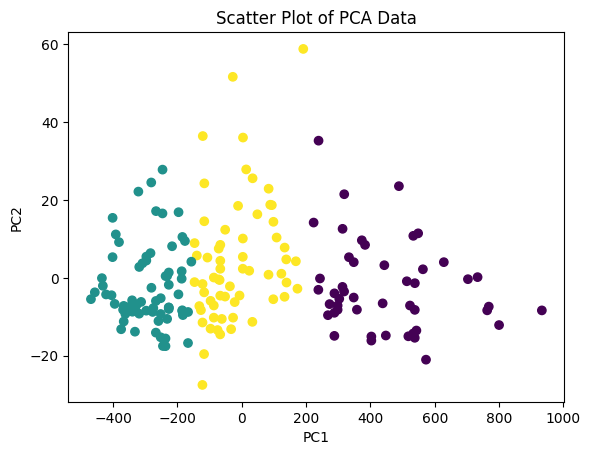

In [66]:
# prompt: PCA df

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df.drop('Wine', axis=1))
pca_data = pca.transform(df.drop('Wine', axis=1))

# Create a scatter plot with the PCA data
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df['cluster'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter Plot of PCA Data')
plt.show()
